Google stock price prediction using Facebook Prophet algorithm. This algorithm is used in the applications of time series forecasting, specially when there is a possibility of seasonal effects.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import warnings

# install facebook prophet
!pip install prophet
import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import dataset. This dataset was collected from Yahoo Finance

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [4]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-23,87.480003,87.695000,85.886002,86.742996,86.742996,43232000
1,2020-11-24,86.525002,88.580002,86.384499,88.444000,88.444000,31560000
2,2020-11-25,88.644501,88.927002,87.827003,88.571503,88.571503,20916000
3,2020-11-27,88.654503,90.199997,88.622002,89.659500,89.659500,17698000
4,2020-11-30,89.059196,89.403252,87.750000,88.037003,88.037003,36476000


Visualize the data

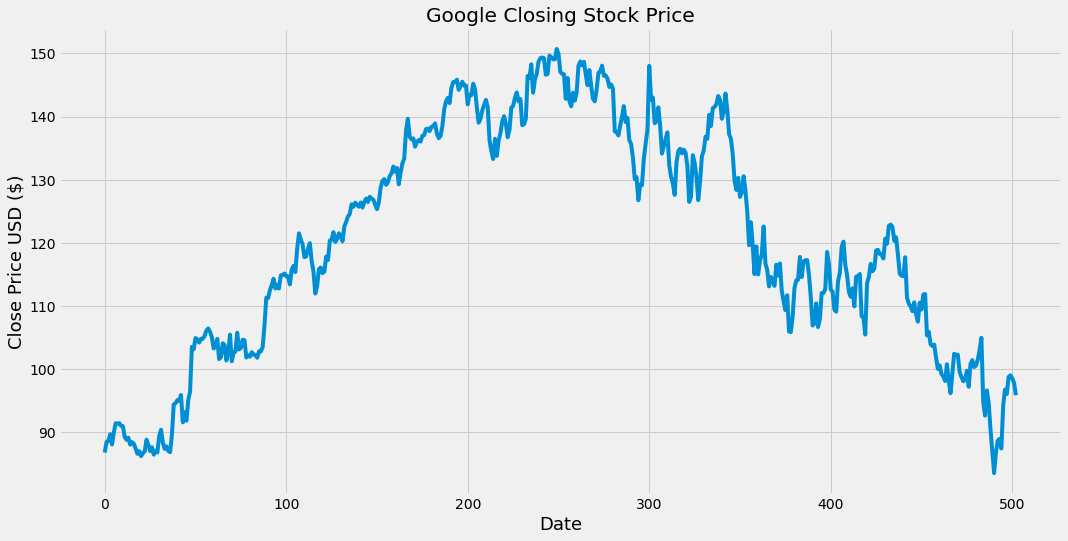

In [5]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

Only two features are needed from the dataset that is Date and Close Prices. So let’s prepare the data for the model---

In [6]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2020-11-23,86.742996
1,2020-11-24,88.444000
2,2020-11-25,88.571503
3,2020-11-27,89.659500
4,2020-11-30,88.037003


Now let’s fit the data to the Facebook Prophet model for stock price prediction of Google---

In [8]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiximfkbu/qsovgaqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiximfkbu/hwwmoz7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16371', 'data', 'file=/tmp/tmpiximfkbu/qsovgaqu.json', 'init=/tmp/tmpiximfkbu/hwwmoz7a.json', 'output', 'file=/tmp/tmpiximfkbu/prophet_model6wrk2r4o/prophet_model-20221122232957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Now let’s have a look at the stock price prediction made by the model---

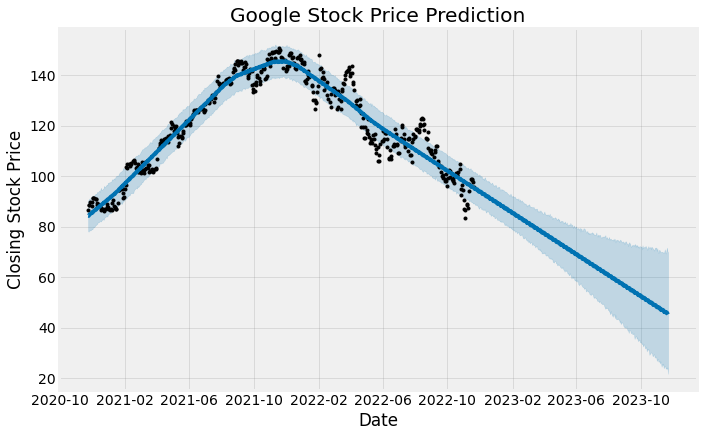

In [9]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Google Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

let’s have a look at the seasonal affects on this prediction that is made by the model---

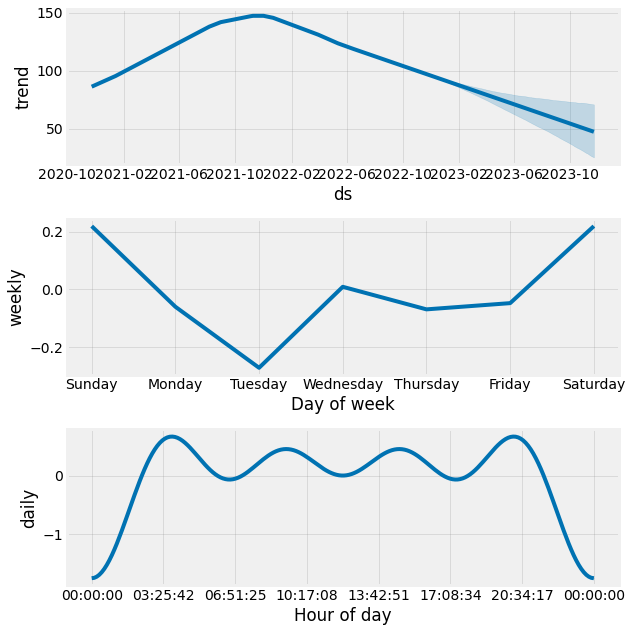

In [10]:
m.plot_components(predictions)
plt.show()